# Project

In the lesson, we explored using plot asthetics to project additional dimensions onto the two dimensional plots, and used scatter plot matrices to examine the relationships between several variables. In this exercise we want to put that to practice in order to create good visualizations. 

Let's begin by loading the data.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize': (10, 8)})

bank = pd.read_csv('../data/bank-full.csv', sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In some cases, faceting can be done relatively easily using the `row` or `col` arguments if that option exists. For example, `catplot` has that option, so we can use it to create several bar plots.

- Using `catplot`, display a bar plot showing counts for each job, with bars color-coded by whether the customer is a homeowner or not. You need to ensure that your plot is well proportioned. <span style="color:red" float:right></span>

In [107]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


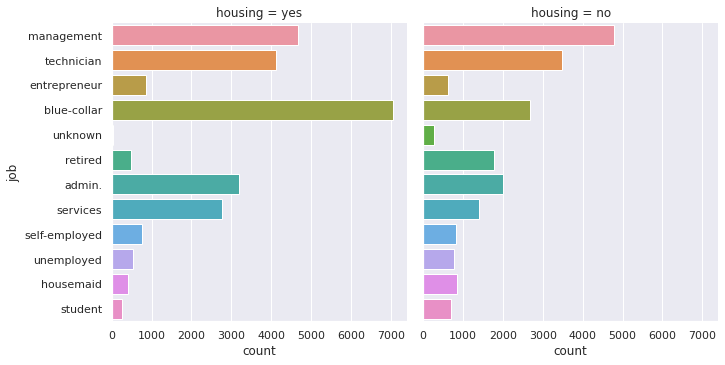

In [105]:
## your code goes here
sns.catplot(y='job',col='housing',data=bank,kind='count')

- Break up the above plot by the customer's marital status. In other words, display a separate bar plot for each category in `marital`. You can use either the `row` or `col` argument to do this. <span style="color:red" float:right></span>

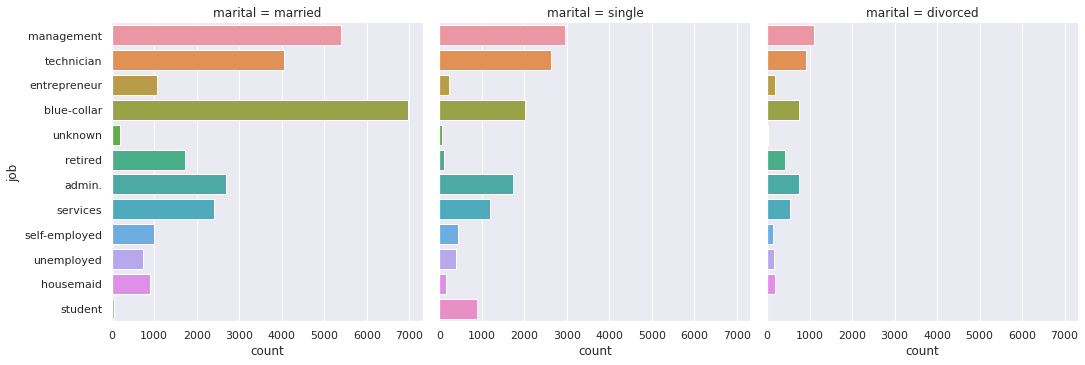

In [115]:
## your code goes here
sns.catplot(y='job',col='marital',data=bank,kind='count')

- Use a visualization to show how homeowners and renters' balances compare, and whether this effect is different for married vs single customers. Note that balance is a highly skewed variable, so use the log of balance instead of balance itself (use the `np.log10` function). To simplify things, leave out the negative balances from the plot. Choose your visualization carefully and short summary of what your visualization shows. <span style="color:red" float:right></span>

In [108]:
## your code goes here
#slice out the negative balance values
bank['balance'][bank['balance']<0].value_counts

<bound method IndexOpsMixin.value_counts of 25      -372
28      -246
36        -7
37        -3
45      -171
        ... 
44626   -205
44629    -46
44836   -195
44908   -130
44964    -42
Name: balance, Length: 3766, dtype: int64>

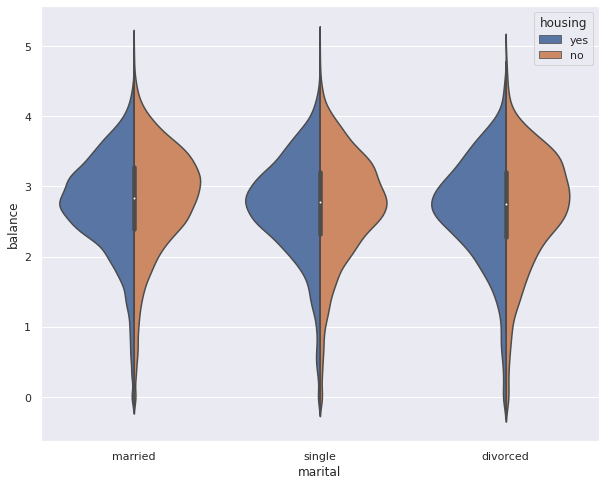

In [109]:
sns.violinplot(x = bank['marital'], y =np.log10(bank['balance'][bank['balance']>0]),hue=bank['housing'],split=True);

As a summary, I choose the violin plot for the visualization. The violin plot can help identify the similarity and differences in the comparision with a quick glance.   

The balance for owning the house are similar among the married, single and divorced group of people. 
As the Married people has little bit high balance as renting the house compare to the single and divorced people.  
The divorced group has more people with renting compare the other group. 

Unforetunately not all visualization functions in `seaborn` have a `row` or `col` argument. When that's the case, we use `FacetGrid`, which acts as a wrapper for the visualization functions. Here's an example with `sns.boxplot`:

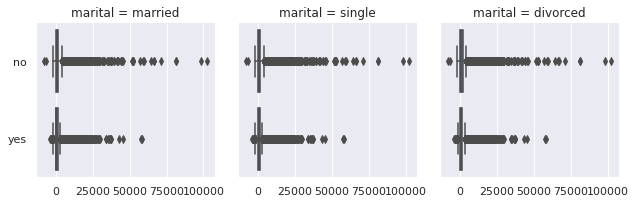

In [110]:
g = sns.FacetGrid(data = bank, col = 'marital')
g = g.map(sns.boxplot, data = bank, x = 'balance', y = 'housing', order = ['no', 'yes'])

The above plot is not very good. It has the following flaws that you need to fix:

- The box plot is too squashed because of the `balance` has a very skewed distribution. So use `log_balance` instead. However, let the tickmark labels on the x-axis still show values for `balance`, not `log_balance`. To do this, you will need to find out how to specify where to draw tickmarks and how to specify your own labels for the tickmarks. Your tickmarks on the x-axis should show only the following balance amounts: 0, 10, 100, 1000, 10k, and 100k. Your tickmarks on the y-axis should show `rent` and `own`. <span style="color:red" float:right></span>
- Having three plots side by side like this is not adding any benefit. We want the plot to make it easy to compare housing vs renting, and to compare across marital status. So stack the three plots vertically instead, and strech out the plots in the horizontal direction to make use of the space. <span style="color:red" float:right></span>
- Color-code the box-plots so that homeowners and renters have different colors. Note that in this case, color is a redundant aesthetic, but it makes it easier to make comparisons. <span style="color:red" float:right></span>

Set up the facetgrid with the row types and the ratio aspect as height and width

since the original balance is too skewed, using log10 on the balance value to make the plot more centered

Set the x & y tick label with the designated values, use the hue method to identify the rent/house group. 


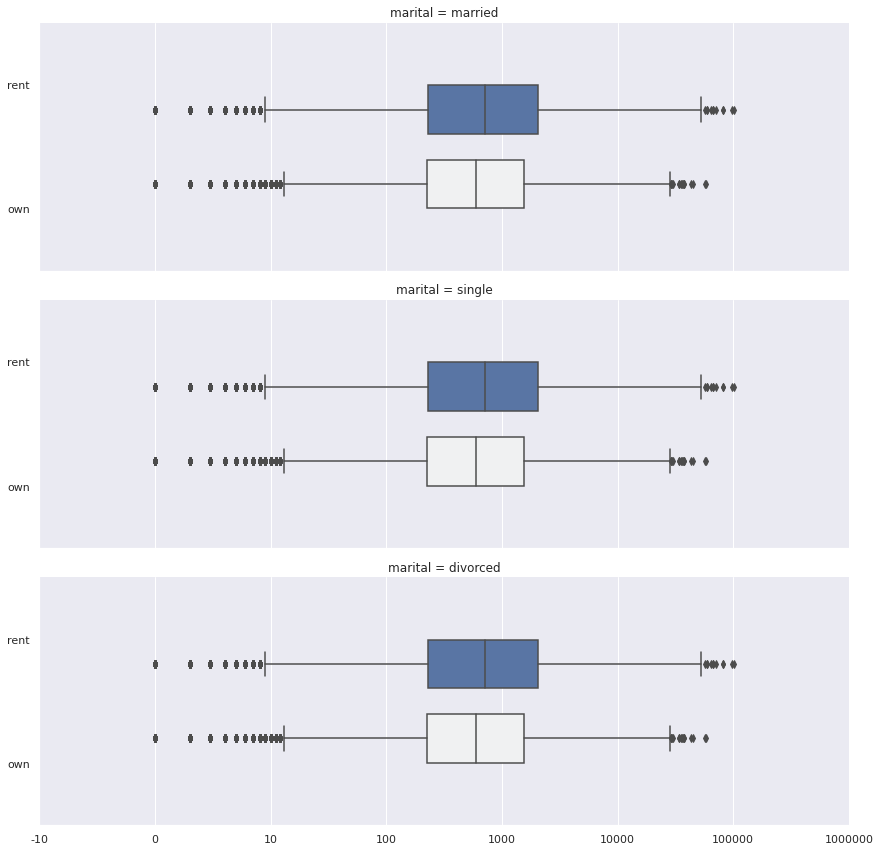

In [114]:
## your code goes here
g = sns.FacetGrid(data = bank, row = 'marital',height=4, aspect=3)
g = g.map(sns.boxplot, data = bank, x = np.log10(bank['balance'][bank['balance']>0]), y = 'housing', order = ['no', 'yes'],hue='housing')
g.set_xticklabels([-10,0,10,100,1000,10000,100000,1000000])
g.set_yticklabels(['rent','own'])

In addition to `FacetGrid`, there is also `PairGrid` and `JointGrid` which can be used to create customized versions of `pairplot` and `jointplot` which we used earlier, but we leave that for you to investigate.

Generally, data visualization can feel like a lot of trial and error. This is normal, since it's hard to say if we have the right plot unless we look at it first. So feel free to try different plots, but be careful to not overdo it with aesthetics and focus on creating a plot that really makes the answer to the question stand out visually.

# End of assignment